In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
plt.style.use(['science'])
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 250
mpl.rcParams.update({'font.size': 8})

import matplotlib.dates as mdates

myFmt = mdates.DateFormatter('%b')

import seaborn as sns

cname = "viridis"
cmap = plt.get_cmap(cname)

In [2]:
def read_summary(file):
    df = pd.read_csv(file)
    df["time_stamp"] = pd.to_datetime(df["time_stamp"])
    df = df.groupby("time_stamp").sum()
    df = df.rolling("7D").mean()
    return df

def get_mean(baselines, column):
    deaths = np.mean([baseline[column] for baseline in baselines], axis=0)
    deaths_error = np.std([baseline[column] for baseline in baselines], axis=0) / np.sqrt(len(baselines))
    deaths_cumsum = np.mean([baseline[column].cumsum() for baseline in baselines], axis=0)
    deaths_cumsum_error = np.std([baseline[column].cumsum() for baseline in baselines], axis=0) / np.sqrt(len(baselines))
    return deaths, deaths_error, deaths_cumsum, deaths_cumsum_error


In [3]:
files = np.sort(glob("../data/children_vaccination_rate/summar*.csv"))
summaries = [read_summary(f) for f in files]

In [4]:
baseline_files = np.sort(glob("../data/children_vaccination_threshold/summar*.csv"))
baseline_summaries = [read_summary(f) for f in baseline_files]

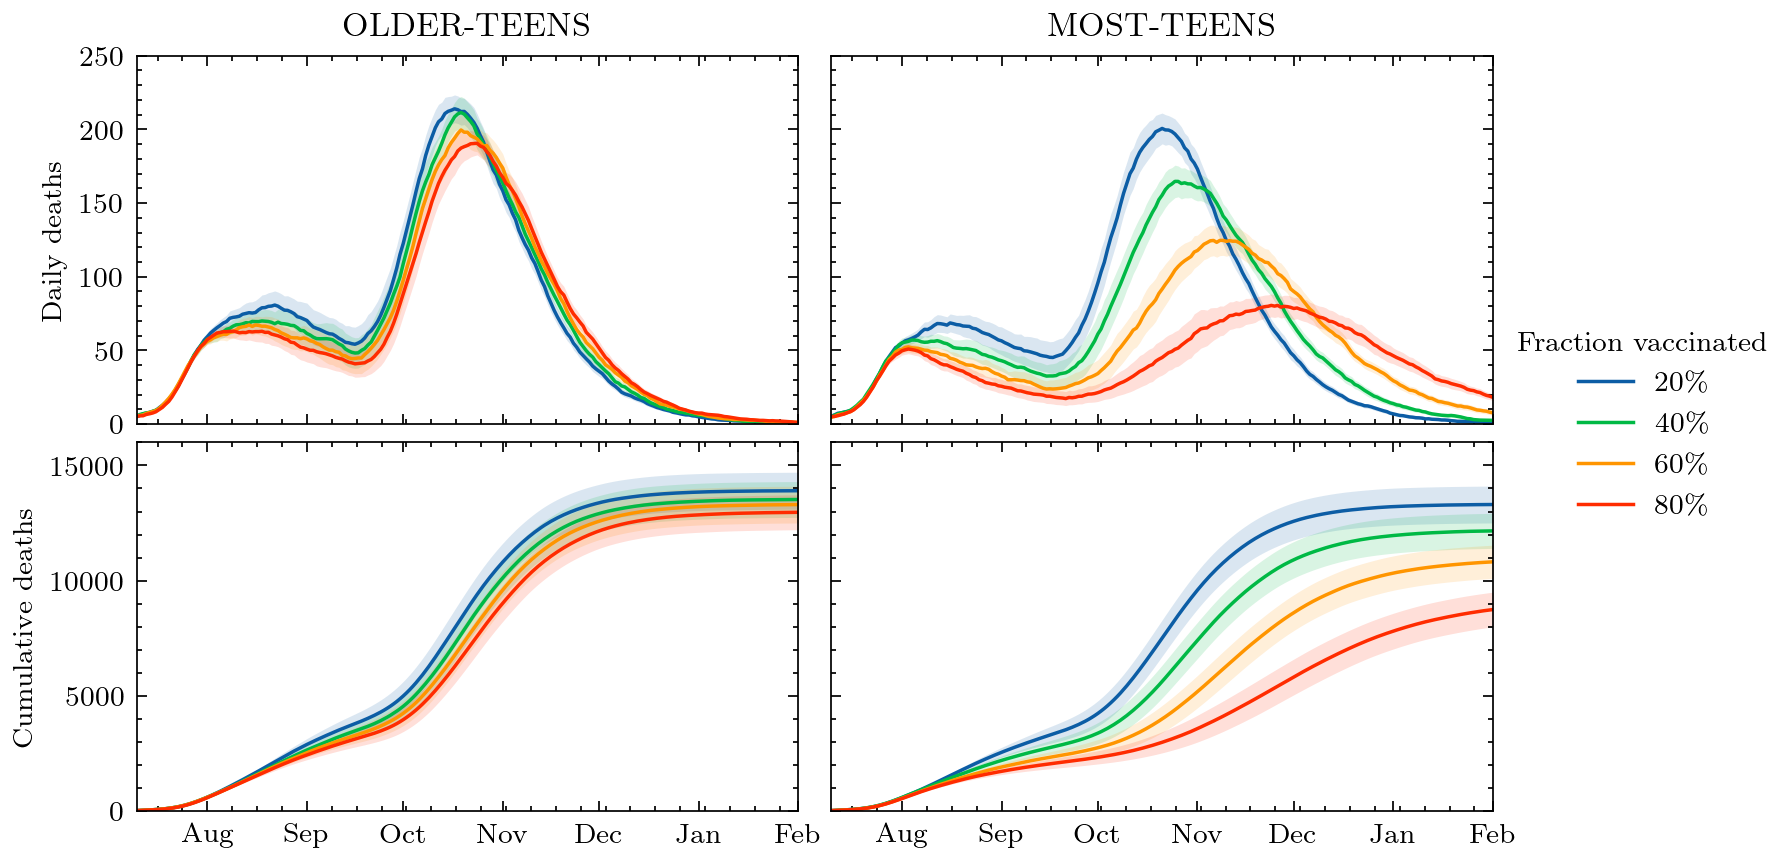

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(7,4), sharex=True)
alpha = 0.15

colors = [f"C{i}" for i in range(3)]
labels = ["20\%", "40\%", "60\%"]

# OLDER-TEENS
for i, rate in enumerate(labels):
    deaths, error, deaths_cumsum, error_cumsum = get_mean(summaries[i*3::9], "daily_deaths")
    ax[0,0].plot(summaries[0].index, deaths, label = rate, color = colors[i])
    ax[0,0].fill_between(summaries[0].index, deaths - error, deaths+error, color = colors[i], alpha=alpha, linewidth=0)
    ax[1,0].plot(summaries[0].index, deaths_cumsum, label = rate, color = colors[i])
    ax[1,0].fill_between(summaries[0].index, deaths_cumsum - error_cumsum, deaths_cumsum + error_cumsum, color = colors[i], alpha=alpha, linewidth=0)

bdeaths, berror, bdeaths_cumsum, berror_cumsum = get_mean(baseline_summaries[0::3], "daily_deaths")
ax[0,0].plot(baseline_summaries[0].index, bdeaths, label = "80\%", color = "C3")
ax[0,0].fill_between(baseline_summaries[0].index, bdeaths - berror, bdeaths + berror, color = "C3", alpha=alpha, linewidth=0)
ax[1,0].plot(baseline_summaries[0].index, bdeaths_cumsum, label = "80\%", color = "C3")
ax[1,0].fill_between(baseline_summaries[0].index, bdeaths_cumsum - berror_cumsum, bdeaths_cumsum + berror_cumsum, color = "C3", alpha=alpha, linewidth=0)


# MOST-TEENS
for i, rate in enumerate(labels):
    deaths, error, deaths_cumsum, error_cumsum = get_mean(summaries[3*i+1::9], "daily_deaths")
    ax[0,1].plot(summaries[0].index, deaths, label = rate, color = colors[i])
    ax[0,1].fill_between(summaries[0].index, deaths - error, deaths+error, color = colors[i], alpha=alpha, linewidth=0)
    ax[1,1].plot(summaries[0].index, deaths_cumsum, label = rate, color = colors[i])
    ax[1,1].fill_between(summaries[0].index, deaths_cumsum - error_cumsum, deaths_cumsum + error_cumsum, color = colors[i], alpha=alpha, linewidth=0)
    
bdeaths, berror, bdeaths_cumsum, berror_cumsum = get_mean(baseline_summaries[1::3], "daily_deaths")
ax[0,1].plot(baseline_summaries[0].index, bdeaths, label ="80\%", color = "C3")
ax[0,1].fill_between(baseline_summaries[0].index, bdeaths - berror, bdeaths + berror, color = "C3", alpha=alpha, linewidth=0)
ax[1,1].plot(baseline_summaries[0].index, bdeaths_cumsum, label = "80\%", color = "C3")
ax[1,1].fill_between(baseline_summaries[0].index, bdeaths_cumsum - berror_cumsum, bdeaths_cumsum + berror_cumsum, color = "C3", alpha=alpha, linewidth=0)

ax[0, 0].set_ylim(0,250)
ax[0, 1].set_ylim(0,250)
ax[1, 0].set_ylim(0, 16000)
ax[1, 1].set_ylim(0, 16000)
ax[0, 0].set_ylabel("Daily deaths")
ax[1, 0].set_ylabel("Cumulative deaths")
ax[0,1].set_yticklabels([])
ax[1,1].set_yticklabels([])


ax[0, 0].set_title("OLDER-TEENS")
ax[0, 1].set_title("MOST-TEENS")
ax[0, 1].legend(loc="center left", bbox_to_anchor=(1,0), title="Fraction vaccinated")

ax[0,0].xaxis.set_major_formatter(myFmt)
ax[0, 0].set_xlim(pd.to_datetime("2021-07-10"), pd.to_datetime("2022-02-01"))
plt.subplots_adjust(wspace=0.05, hspace=0.05)

fig.savefig("../figures/Fig6_vaccination_rates.pdf")